<a href="https://colab.research.google.com/github/AlexTitu/project-sentinel2/blob/main/Proiect_Sentinel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from scipy import stats
import os
import math
import glob

drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/CPPSMS/Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_array = []
folders = os.listdir(base_path)

for i in range(6):
  file_array.append(glob.glob(base_path + folders[i] + '/*.npy'))

print(file_array)

[['/content/drive/MyDrive/CPPSMS/Dataset/S2A_MSIL2A_20170426T091031_N0204_R050_T35TMK_20170426T091503/B.npy', '/content/drive/MyDrive/CPPSMS/Dataset/S2A_MSIL2A_20170426T091031_N0204_R050_T35TMK_20170426T091503/G.npy', '/content/drive/MyDrive/CPPSMS/Dataset/S2A_MSIL2A_20170426T091031_N0204_R050_T35TMK_20170426T091503/R.npy', '/content/drive/MyDrive/CPPSMS/Dataset/S2A_MSIL2A_20170426T091031_N0204_R050_T35TMK_20170426T091503/NIR.npy'], ['/content/drive/MyDrive/CPPSMS/Dataset/S2B_MSIL2A_20180106T091339_N9999_R050_T35TMK_20221026T102707/B.npy', '/content/drive/MyDrive/CPPSMS/Dataset/S2B_MSIL2A_20180106T091339_N9999_R050_T35TMK_20221026T102707/G.npy', '/content/drive/MyDrive/CPPSMS/Dataset/S2B_MSIL2A_20180106T091339_N9999_R050_T35TMK_20221026T102707/R.npy', '/content/drive/MyDrive/CPPSMS/Dataset/S2B_MSIL2A_20180106T091339_N9999_R050_T35TMK_20221026T102707/NIR.npy'], ['/content/drive/MyDrive/CPPSMS/Dataset/S2B_MSIL2A_20171018T091009_N0208_R050_T35TMK_20221104T112450/B.npy', '/content/drive/My

In [ ]:
# Band 2 - folder 0 - B
B2_0 = np.load(file_array[0][0])
B2_0[B2_0 > 1] = 1
B2_0 = (B2_0*(2**15-1)).astype(np.int16)
w, h = np.shape(B2_0)
print('shape', (w, h))
print(np.max(B2_0))
print(np.min(B2_0))


# Band 3 - folder 0 -G
B3_0 = np.load(file_array[0][1])
B3_0[B3_0 > 1] = 1
B3_0 = (B3_0*(2**15-1)).astype(np.int16)
w, h = np.shape(B3_0)
print(np.max(B3_0))
print(np.min(B3_0))
# print('shape', (w, h))

# Band 4 - folder 0 - R
B4_0 = np.load(file_array[0][2])
B4_0[B4_0 > 1] = 1
B4_0 = (B4_0*(2**15-1)).astype(np.int16)
w, h = np.shape(B4_0)
print(np.max(B4_0))
print(np.min(B4_0))
# print('shape', (w, h))

# Band 4 - folder 0 - NIR
B8_0 = np.load(file_array[0][3])
B8_0[B8_0 > 1] = 1
B8_0 = (B8_0*(2**15-1)).astype(np.int16)
w, h = np.shape(B8_0)
print(np.max(B8_0))
print(np.min(B8_0))
# print('shape', (w, h))

shape (10976, 10976)
32767
3
32767
3
32767
3
32767
242


Mean B2: 1608.454715121224
Variance B2: 757585.1497537735


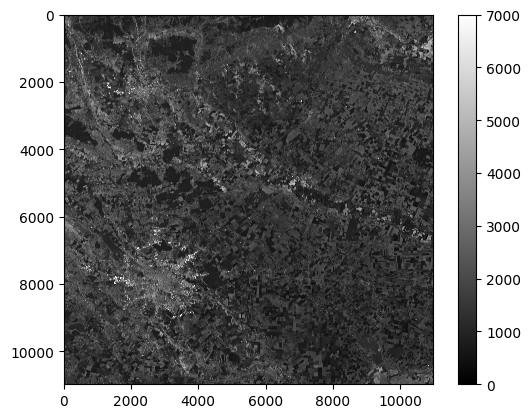

Mean B3: 2569.7036758473564
Variance B3: 913432.4756644196


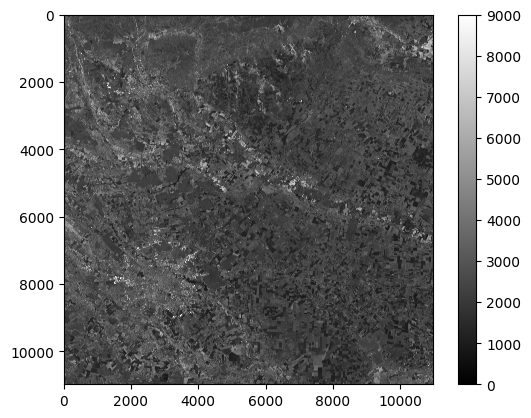

Mean B4: 2491.9681345902322
Variance B4: 2214608.124207675


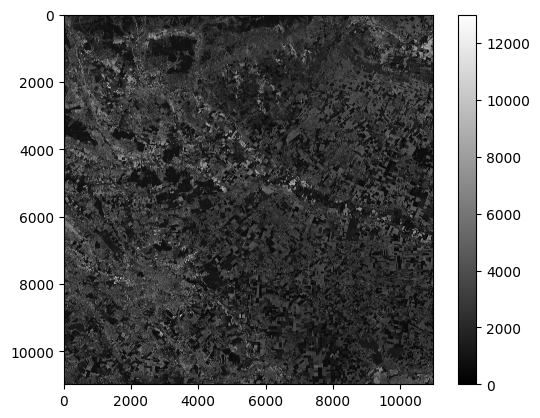

Mean B8: 9633.396803601177
Variance B8: 15340387.922545034


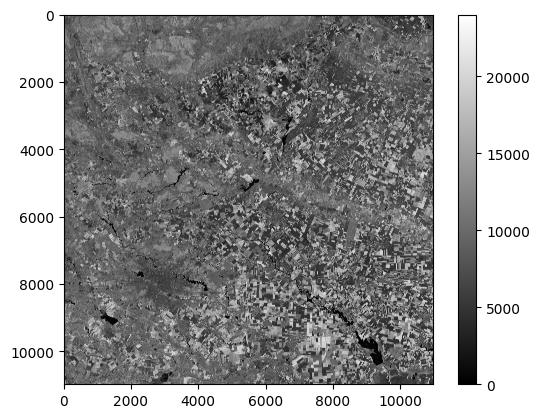

(<Figure size 640x480 with 2 Axes>,
 None)

In [ ]:
# Plot B2 and histogram and print statistics
print("Mean B2: {}".format(np.mean(B2_0)))
print("Variance B2: {}".format(np.var(B2_0)))

plt.figure('Band 2'), plt.imshow(B2_0, cmap='gray', clim=(0,7000)), plt.colorbar(), plt.show()

# Plot B3 and histogram and print statistics
print("Mean B3: {}".format(np.mean(B3_0)))
print("Variance B3: {}".format(np.var(B3_0)))

plt.figure('Band 3'), plt.imshow(B3_0, cmap='gray', clim=(0,9000)), plt.colorbar(), plt.show()

# Plot B4 and histogram and print statistics
print("Mean B4: {}".format(np.mean(B4_0)))
print("Variance B4: {}".format(np.var(B4_0)))

plt.figure('Band 4'), plt.imshow(B4_0, cmap='gray', clim=(0, 13000)), plt.colorbar(), plt.show()

# Plot B8 and histogram and print statistics
print("Mean B8: {}".format(np.mean(B8_0)))
print("Variance B8: {}".format(np.var(B8_0)))

plt.figure('Band 8'), plt.imshow(B8_0, cmap='gray', clim=(0,24000)), plt.colorbar(), plt.show()

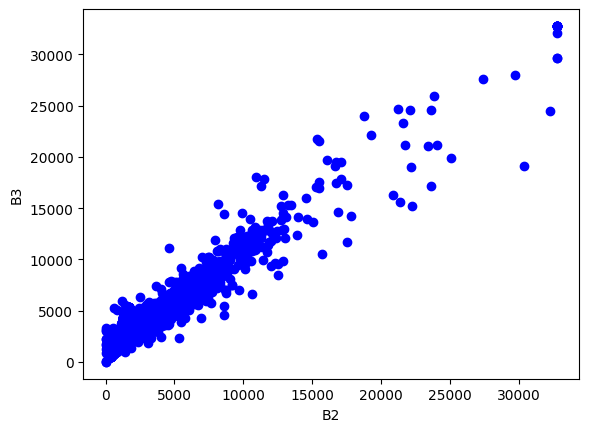

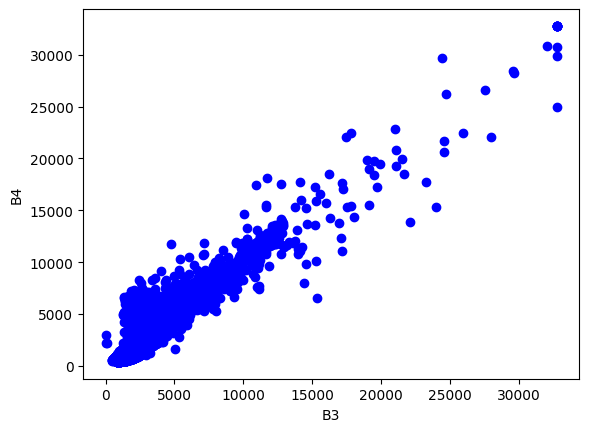

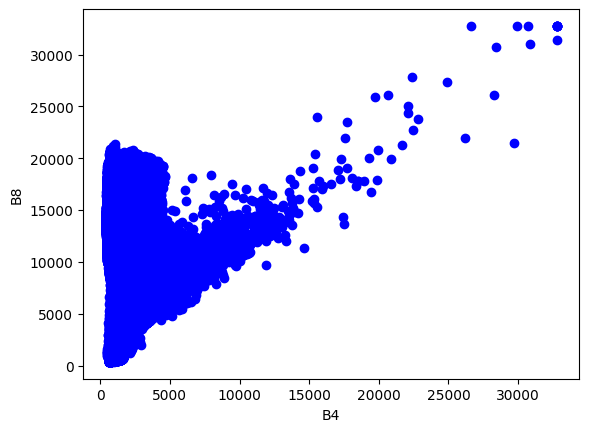

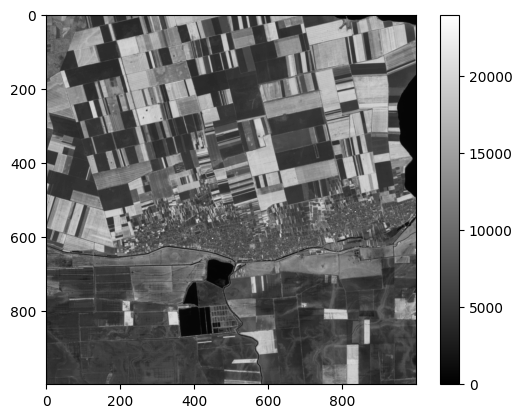

(<Figure size 640x480 with 2 Axes>,
 None)

In [ ]:
# Plot B2 vs B3 scatterogram - correlation
B2_crop = B2_0[-1-1000:-1,-1-1000:-1]
B3_crop = B3_0[-1-1000:-1,-1-1000:-1]
plt.figure('Scatterogram B2-B3'), plt.plot(B2_crop, B3_crop, "ob"), plt.xlabel("B2"),
plt.ylabel("B3"), plt.show()

# Plot B2 vs B3 scatterogram - correlation
B3_crop = B3_0[-1-1000:-1,-1-1000:-1]
B4_crop = B4_0[-1-1000:-1,-1-1000:-1]
plt.figure('Scatterogram B3-B4'), plt.plot(B3_crop, B4_crop, "ob"), plt.xlabel("B3"),
plt.ylabel("B4"), plt.show()

# Plot B2 vs B3 scatterogram - correlation
B4_crop = B4_0[-1-1000:-1,-1-1000:-1]
B8_crop = B8_0[-1-1000:-1,-1-1000:-1]
plt.figure('Scatterogram B4-B8'), plt.plot(B4_crop, B8_crop, "ob"), plt.xlabel("B4"),
plt.ylabel("B8"), plt.show()


# plotez coltul de imagine cu care se lucreaza
plt.figure('Band 8'), plt.imshow(B8_0[-1-1000:-1,-1-1000:-1], cmap='gray', clim=(0,24000)), plt.colorbar(), plt.show()

(array([8.46559575e-06, 8.96126077e-06, 2.45514601e-06, 4.02537043e-06,
        7.47629230e-06, 1.62176685e-05, 5.02255857e-05, 8.25668003e-05,
        9.81996340e-05, 9.78353044e-05, 8.90919777e-05, 8.97832843e-05,
        9.80926935e-05, 1.05359209e-04, 1.03722373e-04, 9.37039435e-05,
        8.22357701e-05, 7.29222506e-05, 6.47646833e-05, 5.73093662e-05,
        4.98614841e-05, 4.23416582e-05, 3.60134144e-05, 3.14753556e-05,
        2.84127404e-05, 2.62755404e-05, 2.41048765e-05, 2.07555879e-05,
        1.58714008e-05, 9.95823991e-06, 5.07224160e-06, 1.83218604e-06,
        3.78338336e-07, 6.37234740e-08, 1.77706289e-08, 7.84035587e-09,
        5.66177556e-09, 4.15450198e-09, 4.00250800e-09, 3.73651855e-09,
        3.31853512e-09, 3.09054416e-09, 2.83722086e-09, 2.78655621e-09,
        2.33057428e-09, 1.79859537e-09, 2.01392017e-09, 1.81126153e-09,
        1.62126906e-09, 2.97021559e-08]),
 array([    0.  ,   655.34,  1310.68,  1966.02,  2621.36,  3276.7 ,
         3932.04,  4587.38

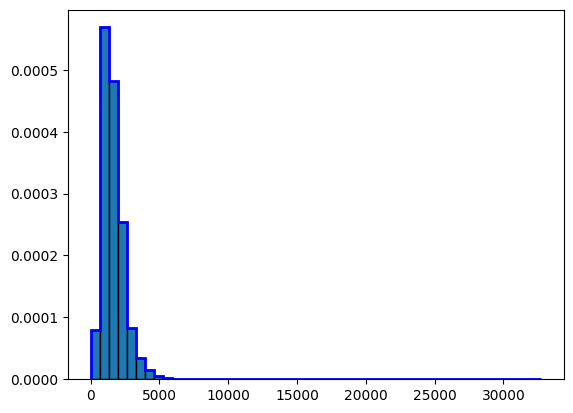

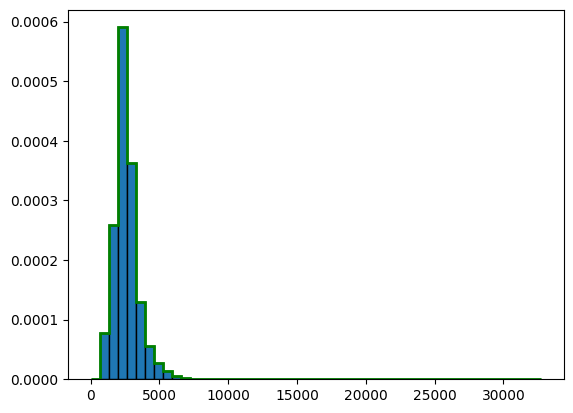

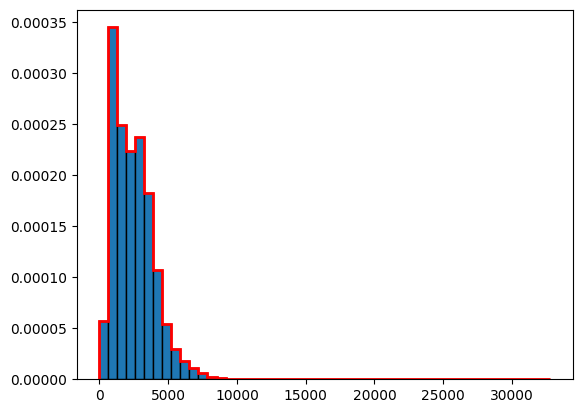

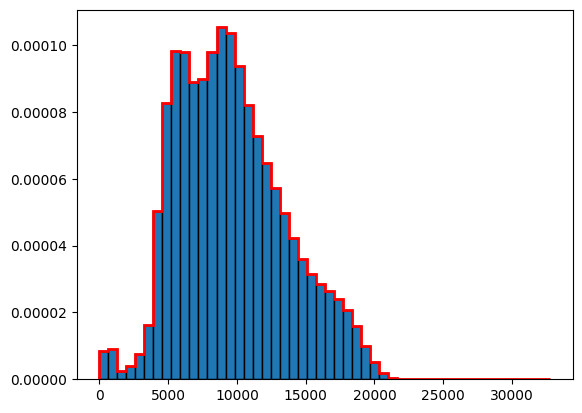

In [ ]:
# Histograms of B2 B3 and B4
B2_0_flat = np.ravel(B2_0)
hist2, bins2 = np.histogram(B2_0, bins=50, range=[0,2**15-1], density=True)
bin_centers = (bins2[:-1] + bins2[1:]) / 2


plt.figure('Hist B2'), plt.bar(bin_centers, hist2, width=bins2[1] - bins2[0], edgecolor='black') # plt.bar(niv, hist6), plt.bar(niv, hist7)
plt.hist(B2_0_flat, bins=50, range=[0, 2**15-1], histtype='step', edgecolor='b', linewidth=2, density=True)


B3_0_flat = np.ravel(B3_0)
hist3, bins3 = np.histogram(B3_0, bins=50, range=[0,2**15-1], density=True)
bin_centers = (bins3[:-1] + bins3[1:]) / 2


plt.figure('Hist B3'), plt.bar(bin_centers, hist3, width=bins3[1] - bins3[0], edgecolor='black') # plt.bar(niv, hist6), plt.bar(niv, hist7)
plt.hist(B3_0_flat, bins=50, range=[0, 2**15-1], histtype='step', edgecolor='g', linewidth=2, density=True)

B4_0_flat = np.ravel(B4_0)
hist4, bins4 = np.histogram(B4_0, bins=50, range=[0,2**15-1], density=True)
bin_centers = (bins4[:-1] + bins4[1:]) / 2


plt.figure('Hist B4'), plt.bar(bin_centers, hist4, width=bins4[1] - bins4[0], edgecolor='black') # plt.bar(niv, hist6), plt.bar(niv, hist7)
plt.hist(B4_0_flat, bins=50, range=[0, 2**15-1], histtype='step', edgecolor='r', linewidth=2, density=True)

B8_0_flat = np.ravel(B8_0)
hist8, bins8 = np.histogram(B8_0, bins=50, range=[0,2**15-1], density=True)
bin_centers = (bins8[:-1] + bins8[1:]) / 2


plt.figure('Hist B8'), plt.bar(bin_centers, hist8, width=bins8[1] - bins8[0], edgecolor='black') # plt.bar(niv, hist6), plt.bar(niv, hist7)
plt.hist(B8_0_flat, bins=50, range=[0, 2**15-1], histtype='step', edgecolor='r', linewidth=2, density=True)


In [ ]:
print(f"B2: {np.unique(B2_0)}")
print(f"B3: {np.unique(B3_0)}")
print(f"B4: {np.unique(B4_0)}")
print(f"B8: {np.unique(B8_0)}")

B2: [    3     6     9 ... 32760 32763 32767]
B3: [    3     9    13 ... 32750 32753 32767]
B4: [    3    16    19 ... 32760 32763 32767]
B8: [  242   249   252 ... 32727 32730 32767]


In [ ]:
mean_B2 = B2_0.mean()
var_B2 = B2_0.var()
print("Mean - Var B2")
print(mean_B2)
print(var_B2)

mean_B3 = B3_0.mean()
var_B3 = B3_0.var()
print("Mean - Var B3")
print(mean_B3)
print(var_B3)

mean_B4 = B4_0.mean()
var_B4 = B4_0.var()
print("Mean - Var B4")
print(mean_B4)
print(var_B4)

mean_B8 = B8_0.mean()
var_B8 = B8_0.var()
print("Mean - Var B8")
print(mean_B8)
print(var_B8)

Mean - Var B2
1608.454715121224
757585.1497537735
Mean - Var B3
2569.7036758473564
913432.4756644196
Mean - Var B4
2491.9681345902322
2214608.124207675
Mean - Var B8
9633.396803601177
15340387.922545034


In [ ]:
B2_0_sub = B2_0_flat[1:10**7]
mean_B2_sub = B2_0_sub.mean()
var_B2_sub = B2_0_sub.var()
print("Mean - Var B2")
print(mean_B2_sub)
print(var_B2_sub)

B4_0_sub = B4_0_flat[1:10**7]
mean_B4_sub = B4_0_sub.mean()
var_B4_sub = B4_0_sub.var()
print("Mean - Var B4")
print(mean_B4_sub)
print(var_B4_sub)

B8_0_sub = B8_0_flat[1:10**7]
mean_B8_sub = B8_0_sub.mean()
var_B8_sub = B8_0_sub.var()
print("Mean - Var B8")
print(mean_B8_sub)
print(var_B8_sub)

Mean - Var B2
1636.5056825505683
712532.8066887638
Mean - Var B4
2427.225457022546
1988259.9871729354
Mean - Var B8
9317.31809693181
7569311.175853166


In [ ]:
sigma_B2_0 = mean_B2_sub*np.sqrt(2/np.pi)
B2_0_sim = np.random.rayleigh(sigma_B2_0, B2_0_sub.size)

sigma_B4_0 = mean_B4_sub*np.sqrt(2/np.pi)
B4_0_sim = np.random.rayleigh(sigma_B4_0, B4_0_sub.size)

sigma_B8_0 = mean_B8_sub*np.sqrt(2/np.pi)
B8_0_sim_Ray = np.random.rayleigh(sigma_B8_0, B8_0_sub.size)

B8_0_sim_Gauss = np.random.normal(mean_B8_sub, np.sqrt(var_B8_sub), B8_0_sub.size)

In [ ]:
print(B2_0_sim)
print(B4_0_sim)
print(B8_0_sim_Ray)

print("Real Mins")
print(np.min(B2_0_sub))
print(np.min(B4_0_sub))
print(np.min(B8_0_sub))

print("Sim Mins")
print(np.min(B2_0_sim))
print(np.min(B4_0_sim))
print(np.min(B8_0_sim_Ray))
print(np.min(B8_0_sim_Gauss))

print("Real Maxes")
print(np.max(B2_0_sub))
print(np.max(B4_0_sub))
print(np.max(B8_0_sub))


print("Sim Maxes")
print(np.max(B2_0_sim))
print(np.max(B4_0_sim))
print(np.max(B8_0_sim_Ray))
print(np.max(B8_0_sim_Gauss))

[ 738.68844095 2325.1580726  3145.97273744 ... 1683.29095134 3682.93418648
 1251.31685938]
[4326.72950024 2460.26874748 2611.17012596 ... 1198.44471038 3313.65038949
 1961.50340688]
[9890.47957438 6976.85022511 6783.72555119 ... 6423.72410598 2881.4282165
 6199.31771023]
Real Mins
3
3
412
Sim Mins
0.18060247931306153
0.8992560328589013
0.7593301571164444
-5865.360629312057
Real Maxes
32767
32767
32767
Sim Maxes
7453.825892285286
11789.360162794464
42897.78737879748
23610.799001308347


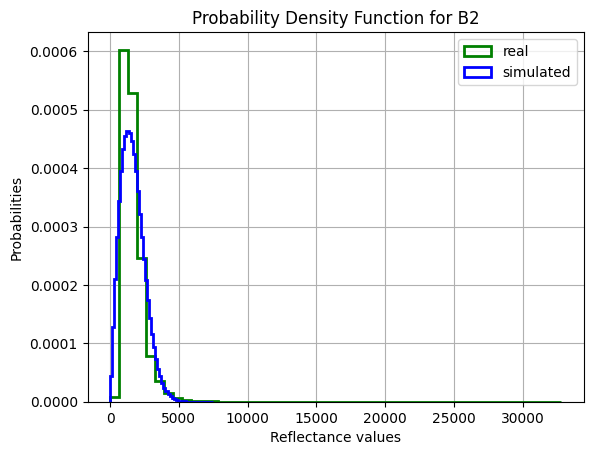

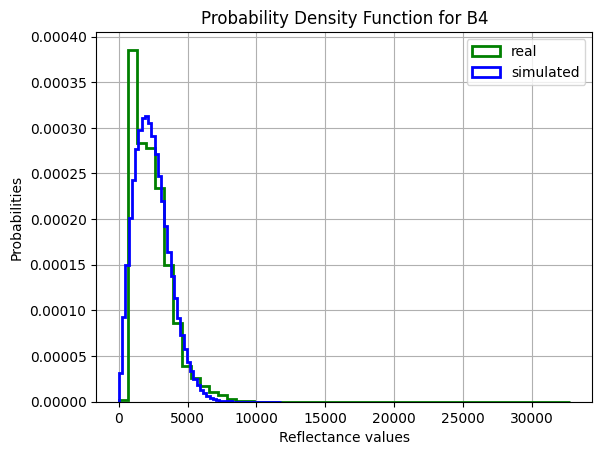

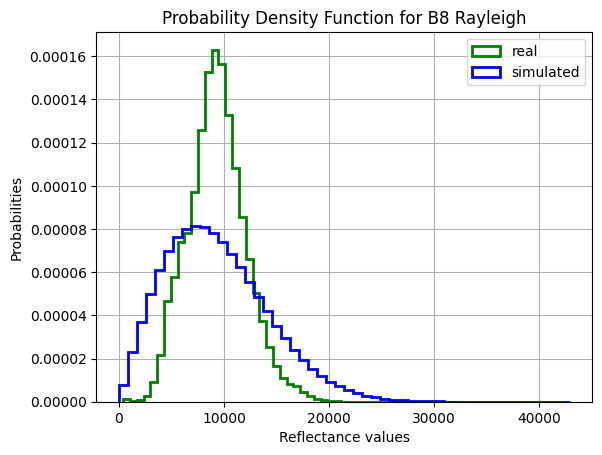

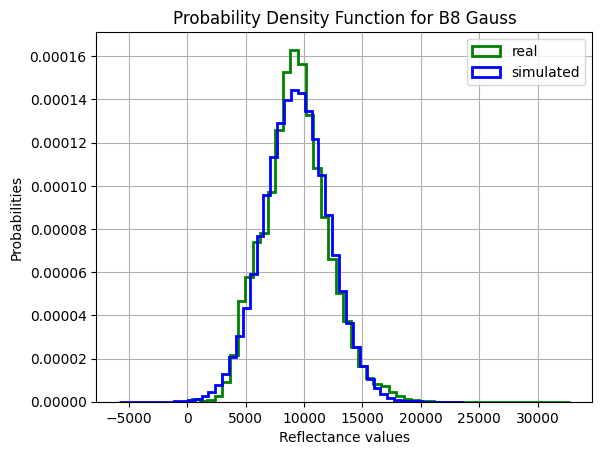

In [ ]:
plt.figure("B2 Density"), plt.hist(B2_0_sub, bins=50, histtype='step', color = 'g', linewidth = 2, density = True),
plt.hist(B2_0_sim, bins=50, histtype='step', color = 'b', linewidth = 2, density = True),
plt.xlabel('Reflectance values'),
plt.ylabel('Probabilities'),
plt.title('Probability Density Function for B2'),
plt.grid(),
plt.legend(['real','simulated'])

plt.figure("B4 Density"), plt.hist(B4_0_sub, bins=50, histtype='step', color = 'g', linewidth = 2, density = True),
plt.hist(B4_0_sim, bins=50, histtype='step', color = 'b', linewidth = 2, density = True),
plt.xlabel('Reflectance values'),
plt.ylabel('Probabilities'),
plt.title('Probability Density Function for B4'),
plt.grid(),
plt.legend(['real','simulated'])

plt.figure("B8 Density Rayleigh"), plt.hist(B8_0_sub, bins=50, histtype='step', color = 'g', linewidth = 2, density = True),
plt.hist(B8_0_sim_Ray, bins=50, histtype='step', color = 'b', linewidth = 2, density = True),
plt.xlabel('Reflectance values'),
plt.ylabel('Probabilities'),
plt.title('Probability Density Function for B8 Rayleigh'),
plt.grid(),
plt.legend(['real','simulated'])

plt.figure("B8 Density Gauss"), plt.hist(B8_0_sub, bins=50, histtype='step', color = 'g', linewidth = 2, density = True),
plt.hist(B8_0_sim_Gauss, bins=50, histtype='step', color = 'b', linewidth = 2, density = True),
plt.xlabel('Reflectance values'),
plt.ylabel('Probabilities'),
plt.title('Probability Density Function for B8 Gauss'),
plt.grid(),
plt.legend(['real','simulated'])

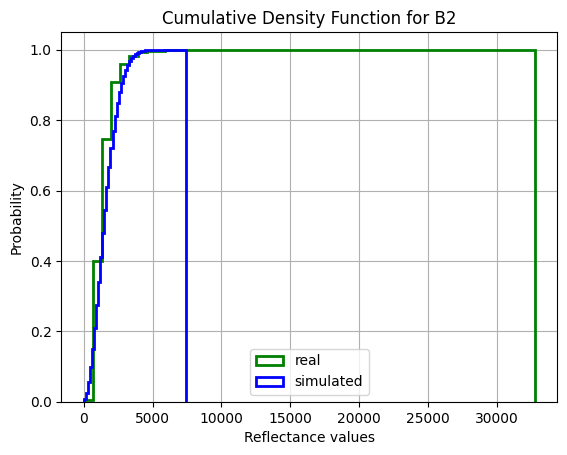

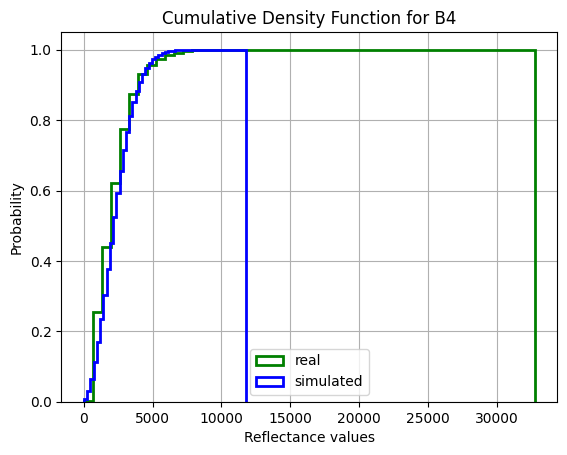

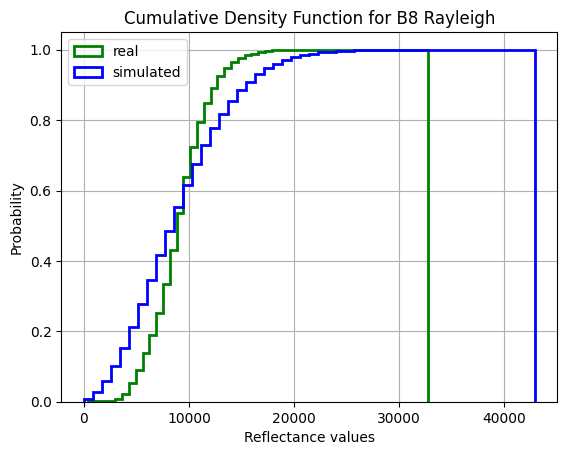

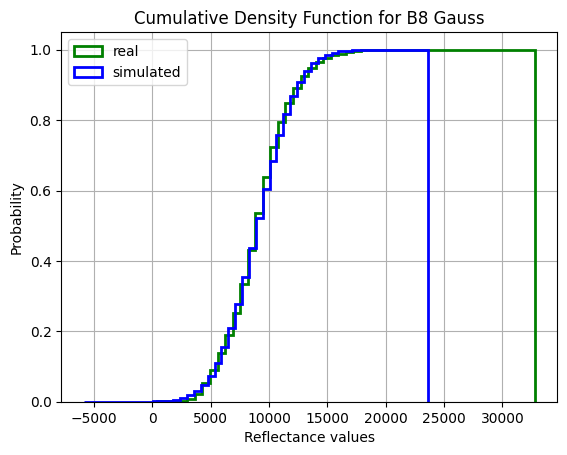

In [ ]:
plt.figure("B2 Density"), plt.hist(B2_0_sub, bins=50, histtype='step', color = 'g', linewidth = 2, density = True, cumulative= True),
plt.hist(B2_0_sim, bins=50, histtype='step', color = 'b', linewidth = 2, density = True, cumulative= True),
plt.xlabel('Reflectance values'),
plt.ylabel('Probability'),
plt.title('Cumulative Density Function for B2'),
plt.grid(),
plt.legend(['real','simulated'])

plt.figure("B4 Density"), plt.hist(B4_0_sub, bins=50, histtype='step', color = 'g', linewidth = 2, density = True, cumulative= True),
plt.hist(B4_0_sim, bins=50, histtype='step', color = 'b', linewidth = 2, density = True, cumulative= True),
plt.xlabel('Reflectance values'),
plt.ylabel('Probability'),
plt.title('Cumulative Density Function for B4'),
plt.grid(),
plt.legend(['real','simulated'])

plt.figure("B8 Density Rayleigh"), plt.hist(B8_0_sub, bins=50, histtype='step', color = 'g', linewidth = 2, density = True, cumulative= True),
plt.hist(B8_0_sim_Ray, bins=50, histtype='step', color = 'b', linewidth = 2, density = True, cumulative= True),
plt.xlabel('Reflectance values'),
plt.ylabel('Probability'),
plt.title('Cumulative Density Function for B8 Rayleigh'),
plt.grid(),
plt.legend(['real','simulated'])

plt.figure("B8 Density Gauss"), plt.hist(B8_0_sub, bins=50, histtype='step', color = 'g', linewidth = 2, density = True, cumulative= True),
plt.hist(B8_0_sim_Gauss, bins=50, histtype='step', color = 'b', linewidth = 2, density = True, cumulative= True),
plt.xlabel('Reflectance values'),
plt.ylabel('Probability'),
plt.title('Cumulative Density Function for B8 Gauss'),
plt.grid(),
plt.legend(['real','simulated'])

In [ ]:
print(stats.ks_2samp(B2_0_sub,B2_0_sim))
print(stats.ks_2samp(B4_0_sub,B4_0_sim))
print(stats.ks_2samp(B8_0_sub,B8_0_sim_Ray))
print(stats.ks_2samp(B8_0_sub,B8_0_sim_Gauss))

KstestResult(statistic=0.1209495120949512, pvalue=0.0, statistic_location=710.9997446891856, statistic_sign=-1)
KstestResult(statistic=0.06368130636813063, pvalue=0.0, statistic_location=746.999730253974, statistic_sign=-1)
KstestResult(statistic=0.1599101159910116, pvalue=0.0, statistic_location=6749.995738398886, statistic_sign=-1)
KstestResult(statistic=0.025103602510360257, pvalue=0.0, statistic_location=10442.0, statistic_sign=1)


(100, 100)
(7, 7)


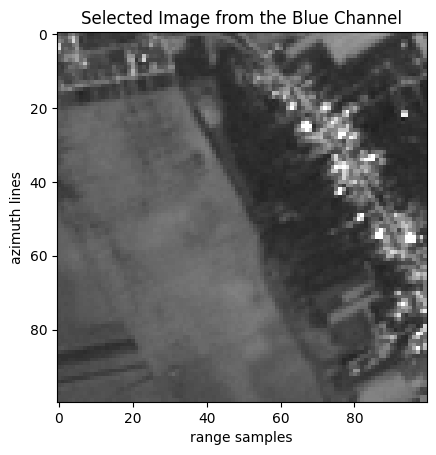

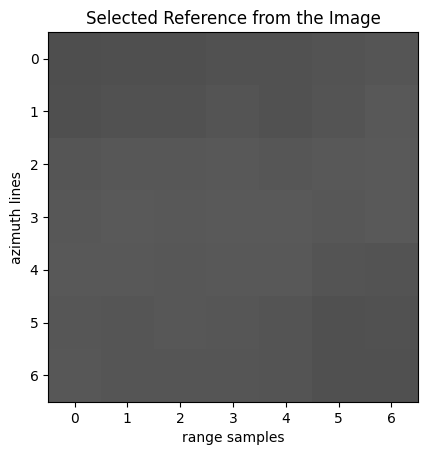

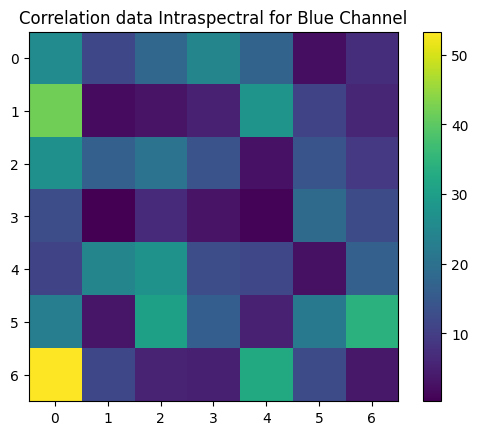

In [ ]:
# Covariate matrix on same image - Band B2 - 7x7 window

w = 100 # dimensiunea noii imaginii

window_size = 7 # dimens ferestrei

# selectez zona de vegetatie prezentata la final
linie_px = 600
coloana_px = 400

x = B2_0[linie_px-w//2:linie_px+w//2, coloana_px-w//2:coloana_px+w//2]

referinta = B2_0[linie_px-window_size//2:linie_px+window_size//2+1,
                 coloana_px-20-window_size//2:coloana_px-20+window_size//2+1]

print(np.shape(x))
print(np.shape(referinta))

h, w = x.shape
capat = int(math.floor(window_size/2))



def corMatLocal(element, img, h, w, window_size, capat):
    # PARAMETERS : element de comparat, imaginea, dim imaginii, dim ferestrei, capat
    # RETURN  :   matricea de covarianta a imaginii

    # initializez imaginea pentru filtrare cu 0
    corMat = np.zeros([window_size, window_size])
    # parcurg imaginea, decupez si aplic functia scrisa anterior pentru fiecare fereastra
    for i in range(capat, h - capat):
        for j in range(capat, w - capat):
            # window = img[i - capat:i + capat+1, j - capat:j + capat+1]
            # covMat[i - capat:i + capat+1, j - capat:j + capat+1] = cov(element, window, window_size)
            window = img[i - capat:i + capat + 1, j - capat:j + capat + 1]
            corMat += np.multiply(window, element.T) # produs element cu element
            # returnez imag_filtra
        return (1.0 / (float(w) ** 2)) * corMat

    # returnez imag_filtra
    # return corMat


# portiunea aleasa din imagine
plt.figure(), plt.imshow(x, cmap='gray', clim=(0,3*np.mean(x))),
plt.xlabel("range samples"),
plt.ylabel("azimuth lines"),
plt.title("Selected Image from the Blue Channel"),
plt.show()

# portiunea de referinta
plt.figure(), plt.imshow(referinta, cmap='gray', clim=(0,3*np.mean(referinta))),
plt.xlabel("range samples"),
plt.ylabel("azimuth lines"),
plt.title("Selected Reference from the Image"),
plt.show()

# matricea de corelatie R
corMatB2 = corMatLocal(referinta, x, int(h), int(w), window_size, capat)
plt.figure(), plt.imshow(np.abs(corMatB2)),
plt.colorbar(),
plt.title("Correlation data Intraspectral for Blue Channel"),
plt.show()


# Nu am mai comentat aici, scrieti voi in functie de ce e in grafic si cum am
# comentat pentru seria temporala de mai jos (dupa clusterizare)

# Tineti cont de proprietatile matricii de corelatie
# 1. simetrie fata de diag principala
# 2. valori maxime pe diagonala principala
# Aceleasi proprietati sunt si la matricea de covariatie

# La cazul intraspectral nu inteleg dc nu se respecta conditiile
# La toate celelalte e ok

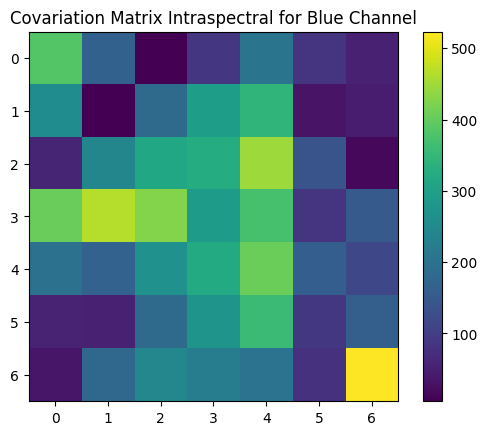

In [ ]:
def covMatLocal(element, img, h, w, window_size, capat):
    # PARAMETERS : element de comparat, imaginea, dim imaginii, dim ferestrei, capat
    # RETURN  :   matricea de covarianta a imaginii

    # initializez imaginea pentru filtrare cu 0
    covMat = np.zeros([window_size, window_size])
    # parcurg imaginea, decupez si aplic functia scrisa anterior pentru fiecare fereastra
    for i in range(capat, h - capat):
        for j in range(capat, w - capat):
            # window = img[i - capat:i + capat+1, j - capat:j + capat+1]
            # covMat[i - capat:i + capat+1, j - capat:j + capat+1] = cov(element, window, window_size)
            window = img[i - capat:i + capat + 1, j - capat:j + capat + 1]
            md = np.reshape(np.mean(window,1),[window_size,1])
            covMat += np.multiply((window-md),(element-md).T) # produs element cu element
            # returnez imag_filtra
        return (1.0 / (float(w) ** 2)) * covMat

    # returnez imag_filtra
    # return covMat


# matricea de covariatie C
covMatB2 = covMatLocal(referinta, x, int(h), int(w), window_size, capat)
plt.figure(), plt.imshow(np.abs(covMatB2)),
plt.colorbar(),
plt.title("Covariation Matrix Intraspectral for Blue Channel"),
plt.show()

# Nu am mai comentat aici, scrieti voi in functie de ce e in grafic si cum am
# comentat pentru seria temporala de mai jos (dupa clusterizare)
# Cu toate acestea se poate observa la matricea coef de corelatie ca cei mai
# corelati pixeli sunt in centru putin spre stanga, exact cum am ales eu referinta
# referinta e un petic de campie necultivata

(7, 7)


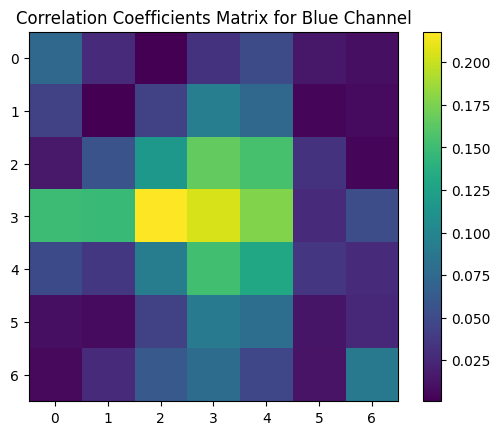

In [ ]:
slocal = np.std(referinta, 1) # deviatia standard
Slocal  = np.diag(1/slocal)
print(np.shape(Slocal))

# Matricea coef de corel locala
Hlocal  = np.matmul(np.matmul(Slocal ,np.abs(covMatB2)),Slocal)
plt.figure(), plt.imshow(np.abs(Hlocal)),
plt.colorbar(),
plt.title("Correlation Coefficients Matrix for Blue Channel"),
plt.show()

# Nu am mai comentat aici, scrieti voi in functie de ce e in grafic si cum am
# comentat pentru seria temporala de mai jos (dupa clusterizare)

(100, 100, 4)
4


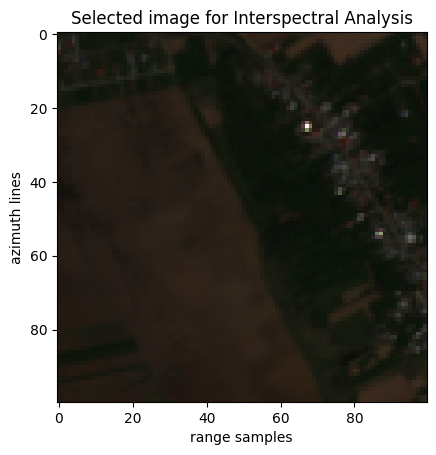

In [ ]:
# Calculez matricea de corelatie, covariatie si a coeficientilor de corelatie
# Pentru o imagine multispectrala cu benzile Blue, Green, Red, Near InfraRed
# Studiul determina matricile de corelatie, covariatie si a coeficientilor de
# corelatie pentru cazul Inter-Spectral

w = 100 # dimensiunea noii imaginii

window_size = 7 # dimens ferestrei

# selectez zona de vegetatie prezentata la final
linie_px = 600
coloana_px = 400

# afisez RGB imaginea selectata
img_selectata = np.dstack((B4_0[linie_px-w//2:linie_px+w//2, coloana_px-w//2:coloana_px+w//2],
                 B3_0[linie_px-w//2:linie_px+w//2, coloana_px-w//2:coloana_px+w//2],
                 B2_0[linie_px-w//2:linie_px+w//2, coloana_px-w//2:coloana_px+w//2]))

B_full = np.dstack((B2_0[linie_px-w//2:linie_px+w//2, coloana_px-w//2:coloana_px+w//2],
                 B3_0[linie_px-w//2:linie_px+w//2, coloana_px-w//2:coloana_px+w//2],
                 B4_0[linie_px-w//2:linie_px+w//2, coloana_px-w//2:coloana_px+w//2],
                 B8_0[linie_px-w//2:linie_px+w//2, coloana_px-w//2:coloana_px+w//2]))

h, w, s = B_full.shape
print(np.shape(B_full))

n = np.size(B_full,2)

print(n)

plt.figure(), plt.imshow(img_selectata/np.max(img_selectata)),plt.xlabel("range samples"),
plt.ylabel("azimuth lines"),
plt.title("Selected image for Interspectral Analysis"),
plt.show()

In [ ]:
B_full = np.reshape(B_full,[(w**2),n]).T # 6 linii = numarul de imagini - w**2 coloane
                          # coloanele = realiz partic ale fiecarui pixel
print(np.shape(B_full))

(4, 10000)


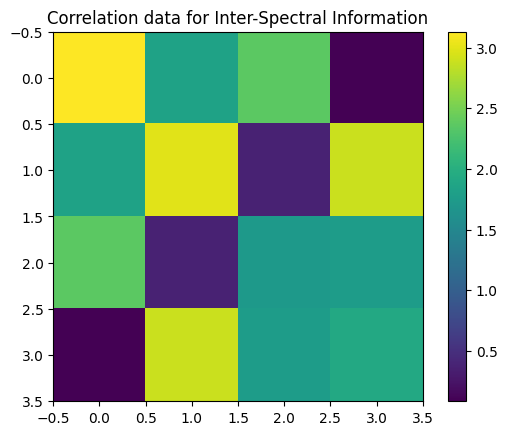

In [ ]:

# Matrice de corelatie - simetrica fata de diag principala
# valorile mai ridicate pe diag principala

m = w**2
RInterspec =  np.matmul(B_full,B_full.T)*(1/(m))

plt.figure(), plt.imshow(np.abs(RInterspec)),
plt.colorbar(),
plt.title("Correlation data for Inter-Spectral Information"),
plt.show()

# Nu am mai comentat aici, scrieti voi in functie de ce e in grafic si cum am
# comentat pentru seria temporala de mai jos (dupa clusterizare)

(4, 1)


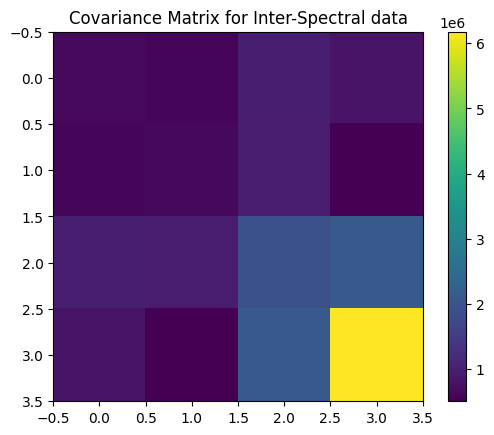

In [ ]:
# Matricea de covariatie
# calculam media pentru fiecare variabila - pe linie
md = np.reshape(np.mean(B_full,1),[n,1])
print(np.shape(md))

CInterspec =np.matmul((B_full-md),(B_full-md).T)*(1/(m))
plt.figure(), plt.imshow(np.abs(CInterspec)),
plt.colorbar(),
plt.title("Covariance Matrix for Inter-Spectral data"),
plt.show()

# Nu am mai comentat aici, scrieti voi in functie de ce e in grafic si cum am
# comentat pentru seria temporala de mai jos (dupa clusterizare)

# variatia devine mai uniforma, diferenta dintre val minima si maxima a mai scazut
# nu mai sunt discrepante mari intre val din matrice

(4, 4)


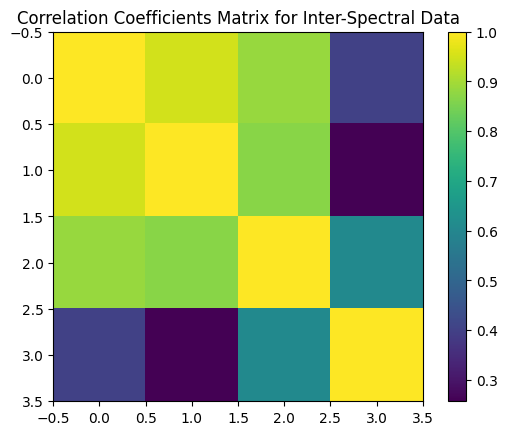

In [ ]:
# matricea coef de corelatie
# la fel ca inainte trebuie sa calcula deviatia standard pt fiecare linie caci acolo
# avem variabilele - by default, functia face pe coloana

sSpec = np.std(B_full, 1) # deviatia standard
SSpec = np.diag(1/sSpec)
print(np.shape(SSpec))

HSpec = np.matmul(np.matmul(SSpec, np.abs(CInterspec)),SSpec)
plt.figure(), plt.imshow(np.abs(HSpec)),
plt.colorbar(),
plt.title("Correlation Coefficients Matrix for Inter-Spectral Data"),
plt.show()

# Canalele R,G,B sunt puternic corelate fiind si foarte apropiate ca lungime de
# unda. Canalul Near Infrared este cel mai apropiat cu rosu ca nivel al coef
# de corelatie, green fiind cel mai slab corelat si blue aproape la fel de slab

In [ ]:
from sklearn import cluster,datasets # clusterizarea imaginii cu k-means

# creez imaginea RGB

img = np.dstack(((B4_0[8000:9000,3000:4000]/np.max(B4_0)),(B3_0[8000:9000,3000:4000]/np.max(B3_0)),(B2_0[8000:9000,3000:4000]//np.max(B2_0))))
dims = np.shape(img)
print(dims)

# vectorizez canalele de culoare
B = np.ndarray.flatten(B2_0[8000:9000,3000:4000])
G = np.ndarray.flatten(B3_0[8000:9000,3000:4000])
R = np.ndarray.flatten(B4_0[8000:9000,3000:4000])
NIR = np.ndarray.flatten(B8_0[8000:9000,3000:4000])


print(np.shape(R))

(1000, 1000, 3)
(1000000,)


In [ ]:
# formez setul de date format din histograma color (pixelii de culoare)
data = np.transpose(np.array([R,G,B]))
print(np.shape(data))

(1000000, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


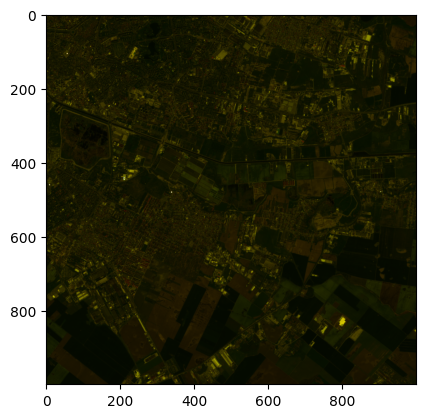

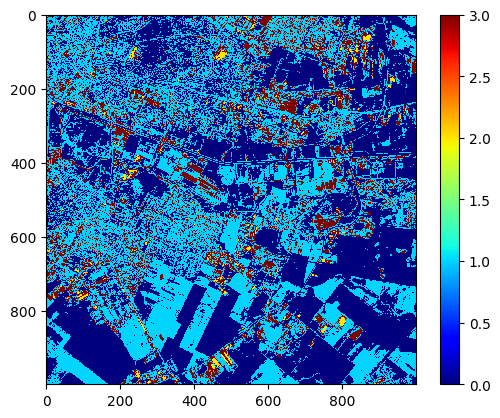

(<Figure size 640x480 with 2 Axes>,
 None)

In [ ]:
K = 4
kmeans = cluster.KMeans(n_clusters=K, random_state=0).fit(data)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

plt.figure(), plt.imshow(img), plt.show()
plt.figure(), plt.imshow(np.reshape(etichete, (dims[0],dims[1])), cmap="jet",interpolation='none'), plt.colorbar(), plt.show()

# albastru inchis - culturi/ campii verzi
# albastru deschis - pamant necultivat
# rosu - cladiri/zone gri
# galben - cladiri/zone albe - reflectanta mai puternica

# orice depaseste 4 clustere devine imposibil de distins ca informatie
# separabilitatea nu mai face sens din pricina informatiei insuficiente cuprinse
# in pixelii color vs complexitatea imaginii 1000x1000 si rezolutia pixelului din img

In [ ]:
dataExt = np.transpose(np.array([NIR,R,G,B]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


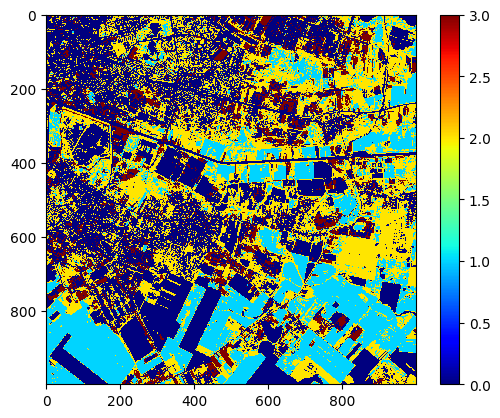

(<Figure size 640x480 with 2 Axes>,
 None)

In [ ]:
K = 4
kmeans = cluster.KMeans(n_clusters=K, random_state=0).fit(dataExt)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

#plt.figure(), plt.imshow(img), plt.show()
plt.figure(), plt.imshow(np.reshape(etichete, (dims[0],dims[1])), cmap="jet",interpolation='none'), plt.colorbar(), plt.show()

In [ ]:
# Iau imaginile din Banda NIR - 8
# Ma pregatesc sa
# Construiesc o serie temporala bazata pe imaginile capturate in NIR

# Band 8 - folder 1 - NIR
B8_1 = np.load(file_array[1][3])
B8_1 [B8_1 > 1] = 1
B8_1 = (B8_1*(2**15-1)).astype(np.int16)
w, h = np.shape(B8_1)
print(np.max(B8_1))
print(np.min(B8_1))
# print('shape', (w, h))

# Band 8 - folder 2 - NIR
B8_2 = np.load(file_array[2][3])
B8_2 [B8_2 > 1] = 1
B8_2 = (B8_2*(2**15-1)).astype(np.int16)
w, h = np.shape(B8_2)
print(np.max(B8_2))
print(np.min(B8_2))
# print('shape', (w, h))

# Band 8 - folder 3 - NIR
B8_3 = np.load(file_array[3][2])
B8_3 [B8_3 > 1] = 1
B8_3 = (B8_3*(2**15-1)).astype(np.int16)
w, h = np.shape(B8_3)
print(np.max(B8_3))
print(np.min(B8_3))
# print('shape', (w, h))

# Band 8 - folder 4 - NIR
B8_4 = np.load(file_array[4][2])
B8_4[B8_4 > 1] = 1
B8_4 = (B8_4*(2**15-1)).astype(np.int16)
w, h = np.shape(B8_4)
print(np.max(B8_4))
print(np.min(B8_4))
# print('shape', (w, h))


# Band 8 - folder 5 - NIR
B8_5 = np.load(file_array[5][2])
B8_5[B8_5 > 1] = 1
B8_5 = (B8_5*(2**15-1)).astype(np.int16)
w, h = np.shape(B8_5)
print(np.max(B8_5))
print(np.min(B8_5))
# print('shape', (w, h))

32767
0
32767
0
32767
32
32767
0
32767
0


In [ ]:
# Construiesc seria temporala bazata pe imaginile capturate in NIR
# Seria va contine 6 imagini: 0 pana la 5

temp_series = np.dstack(((B8_0[8000:9000,3000:4000]),
 (B8_3[8000:9000,3000:4000]),
  (B8_5[8000:9000,3000:4000]),
  (B8_4[8000:9000,3000:4000]),
  (B8_2[8000:9000,3000:4000]),
  (B8_1[8000:9000,3000:4000])))

# 6 imagini asezate astfel incat sa respecte o succesiune temporala

print(np.shape(temp_series))

n = np.size(temp_series,2)

print(n)

(1000, 1000, 6)
6


(1000, 1000)


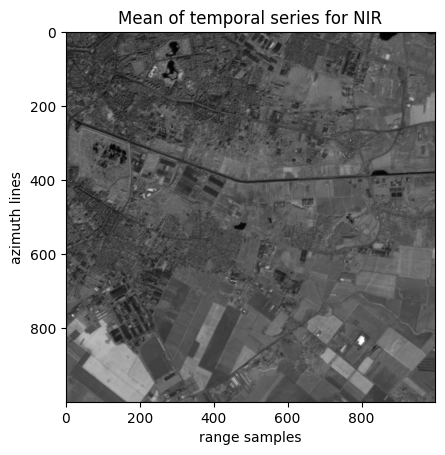

In [ ]:
mean_temp_series = np.mean(temp_series,axis=2)

print(np.shape(mean_temp_series))

plt.figure(), plt.imshow(mean_temp_series, cmap='gray', clim=(0,3*np.mean(mean_temp_series))),
plt.xlabel("range samples"),
plt.ylabel("azimuth lines"),
plt.title("Mean of temporal series for NIR"),
plt.show()

(99, 99, 6)


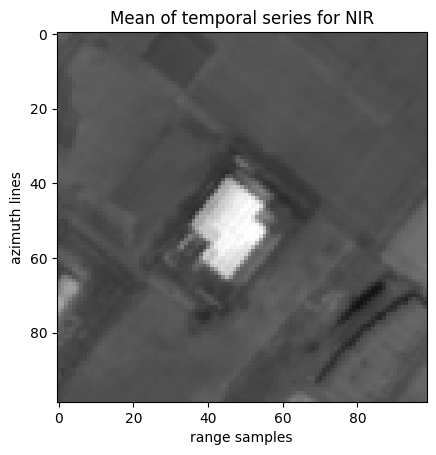

In [ ]:
# lucrez cu o imagine cu coerenta ridicata - cladire ce nu isi modifica
# mult prop, fata de vegetatie

# imagine 5x5 = 25 px = 25 realizari particulare
# construiesc matricea X pentru cladirea alba dreapta jos

linie_px = 830
coloana_px = 800

w = 99 # dimens ferestrei

X = temp_series[linie_px-w//2:linie_px+w//2+1, coloana_px-w//2:coloana_px+w//2+1,:]

print(np.shape(X))

plt.figure(), plt.imshow(np.mean(X,axis=2), cmap='gray', clim=(0,3*np.mean(X))),plt.xlabel("range samples"),
plt.ylabel("azimuth lines"),
plt.title("Mean of temporal series for NIR"),
plt.show()

In [ ]:
X = np.reshape(X,[w**2,n]).T # 6 linii = numarul de imagini - w**2 coloane
                          # coloanele = realiz partic ale fiecarui pixel
print(np.shape(X))

(6, 9801)


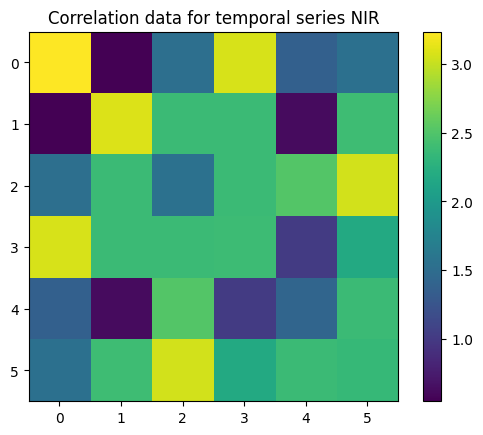

In [ ]:
# Matrice de corelatie - simetrica fata de diag principala
# valorile mai ridicate pe diag principala
m = w**2
R =np.matmul(X,X.T)*(1/(m))

plt.figure(), plt.imshow(np.abs(R)),
plt.colorbar(),
plt.title("Correlation data for temporal series NIR"),
plt.show()

(6, 1)


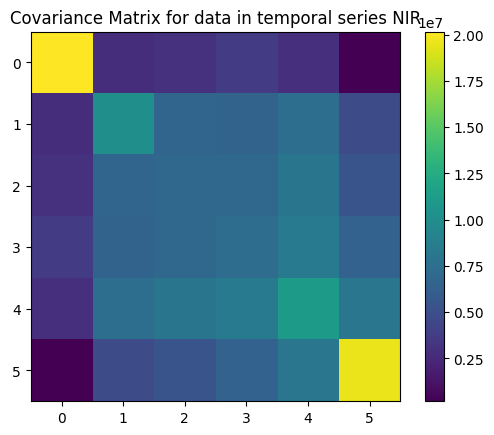

In [ ]:
# Matricea de covariatie
# calculam media pentru fiecare variabila - pe linie
md = np.reshape(np.mean(X,1),[6,1])
print(np.shape(md))

C =np.matmul((X-md),(X-md).T)*(1/(m))
plt.figure(), plt.imshow(np.abs(C)),
plt.colorbar(),
plt.title("Covariance Matrix for data in temporal series NIR"),
plt.show()

# variatia devine mai uniforma, diferenta dintre val minima si maxima a mai scazut
# nu mai sunt discrepante mari intre val din matrice

In [ ]:
# matricea coef de corelatie
# la fel ca inainte trebuie sa calcula deviatia standard pt fiecare linie caci acolo
# avem variabilele - by default, functia face pe coloana

s = np.std(X, 1) # deviatia standard
S = np.diag(1/s)
print(np.shape(S))

(6, 6)


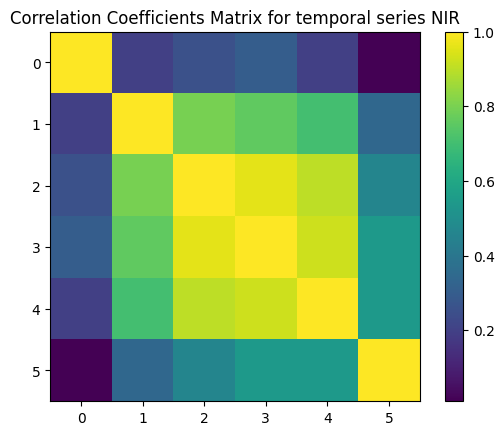

In [ ]:
H = np.matmul(np.matmul(S,np.abs(C)),S)
plt.figure(), plt.imshow(np.abs(H)),
plt.colorbar(),
plt.title("Correlation Coefficients Matrix for temporal series NIR"),
plt.show()
# Avem numai valori cuprise intre 0 si 1 - val max pe diag principala
# coef de corel maxim pt o matrice si ea insasi
# 2, 3 si 4 imagini cu coerenta ridicata

(99, 99, 6)


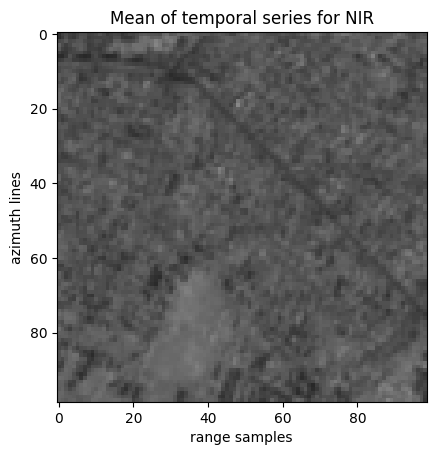

In [ ]:
# aleg o zona cu vegetatie pentru a vedea
# cum variaza corelatia
# Explicatii complete pentru toate matricile, la final!!!
linie_px = 600
coloana_px = 400

w = 99 # dimens ferestrei

X = temp_series[linie_px-w//2:linie_px+w//2+1, coloana_px-w//2:coloana_px+w//2+1,:]

print(np.shape(X))

plt.figure(), plt.imshow(np.mean(X,axis=2), cmap='gray', clim=(0,3*np.mean(X))),plt.xlabel("range samples"),
plt.ylabel("azimuth lines"),
plt.title("Mean of temporal series for NIR"),
plt.show()

In [ ]:
X = np.reshape(X,[w**2,n]).T # 6 linii = numarul de imagini - w**2 coloane
                          # coloanele = realiz partic ale fiecarui pixel
print(np.shape(X))

(6, 9801)


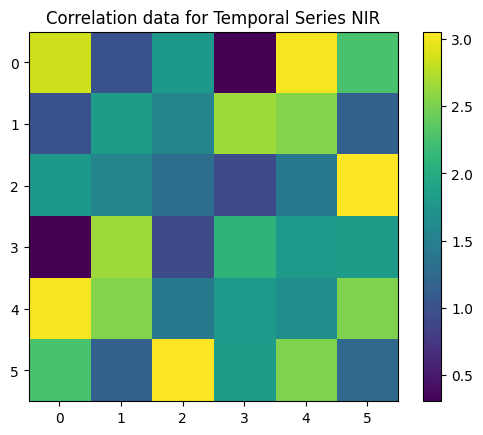

In [ ]:
# Matrice de corelatie - simetrica fata de diag principala
# valorile mai ridicate pe diag principala

m = w**2
R =np.matmul(X,X.T)*(1/(m))

plt.figure(), plt.imshow(np.abs(R)),
plt.colorbar(),
plt.title("Correlation data for Temporal Series NIR"),
plt.show()

(6, 1)


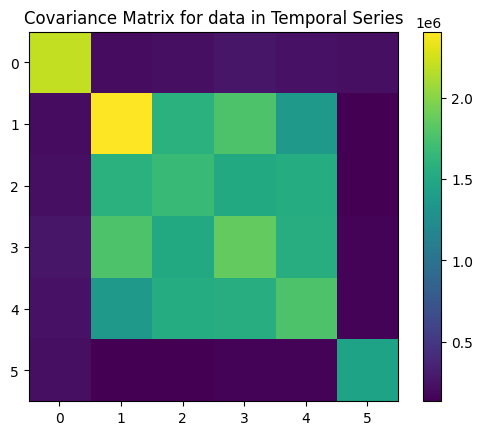

In [ ]:
# Matricea de covariatie
# calculam media pentru fiecare variabila - pe linie
md = np.reshape(np.mean(X,1),[6,1])
print(np.shape(md))

C =np.matmul((X-md),(X-md).T)*(1/(m))
plt.figure(), plt.imshow(np.abs(C)),
plt.colorbar(),
plt.title("Covariance Matrix for data in Temporal Series"),
plt.show()

# variatia devine mai uniforma, diferenta dintre val minima si maxima a mai scazut
# nu mai sunt discrepante mari intre val din matrice

In [ ]:
# matricea coef de corelatie
# la fel ca inainte trebuie sa calcula deviatia standard pt fiecare linie caci acolo
# avem variabilele - by default, functia face pe coloana

s = np.std(X, 1) # deviatia standard
S = np.diag(1/s)
print(np.shape(S))

(6, 6)


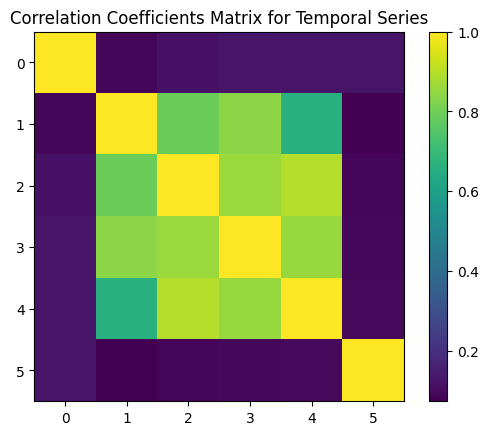

In [ ]:
H = np.matmul(np.matmul(S,np.abs(C)),S)
plt.figure(), plt.imshow(np.abs(H)),
plt.colorbar(),
plt.title("Correlation Coefficients Matrix for Temporal Series"),
plt.show()

# Avem numai valori cuprise intre 0 si 1 - val max pe diag principala
# coef de corel maxim pt o matrice si ea insasi

# 1, 2, 3 si 4 sunt imagini cu coerenta ridicata deoarece sunt in lunile august(img 1)
# septembrie(img 2) si octombrie(img 3 si 4) anul 2017

# Imaginea 0 este captata in luna aprilie 2017, facand sa difere mult zona
# fata de celelalte imagini, iar Imaginea 5 este din luna ianuarie 2018, avand
# loc acelasi fenomen ca in cazul imaginii 0

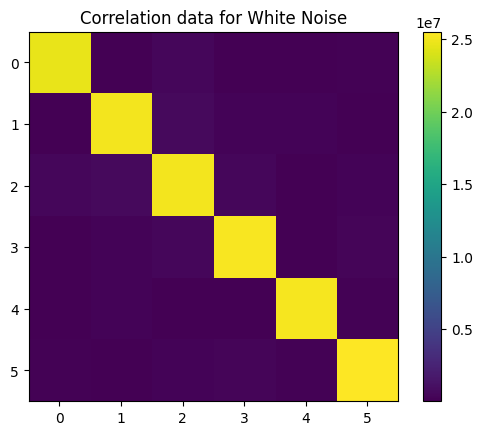

In [ ]:
# studiul corelatiei, cov, si coef de corel pentru zg alb gaussian
# folosit pentru a compara cu imaginea anterioara cu vegetatie ce
# are o coerenta mai slaba

X1 = 5000*np.random.normal(size=(6, 9801))

R1 =np.matmul(X1,X1.T)*(1/(m))
# print(np.shape(R1))

plt.figure(), plt.imshow(np.abs(R1)),
plt.colorbar(),
plt.title("Correlation data for White Noise"),
plt.show()

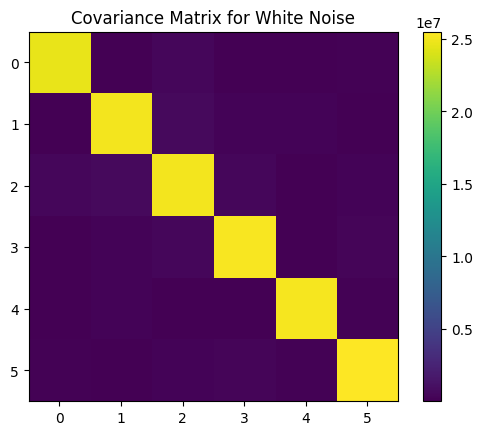

In [ ]:
# Matricea de covariatie
# calculam media pentru fiecare variabila - pe linie
md1 = np.reshape(np.mean(X1,1),[6,1])

C1 = np.matmul((X1-md1),(X1-md1).T)*(1/(m))
plt.figure(), plt.imshow(np.abs(C1)),
plt.colorbar(),
plt.title("Covariance Matrix for White Noise"),
plt.show()

# variatia devine mai uniforma, diferenta dintre val minima si maxima a mai scazut
# nu mai sunt discrepante mari intre val din matrice

(6, 6)


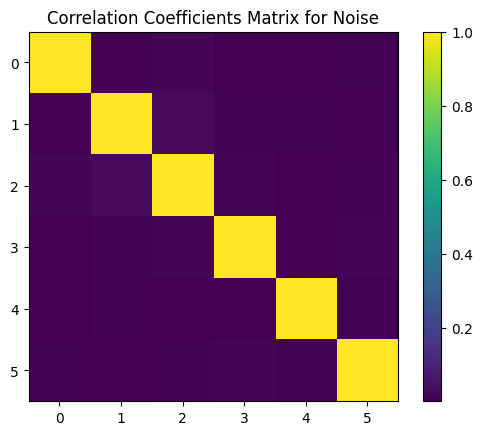

In [ ]:
s1 = np.std(X1, 1) # deviatia standard
S1 = np.diag(1/s1)
print(np.shape(S1))

H1 = np.matmul(np.matmul(S1,np.abs(C1)),S1)
plt.figure(), plt.imshow(np.abs(H1)),
plt.colorbar(),
plt.title("Correlation Coefficients Matrix for Noise"),
plt.show()

(99, 99, 6)


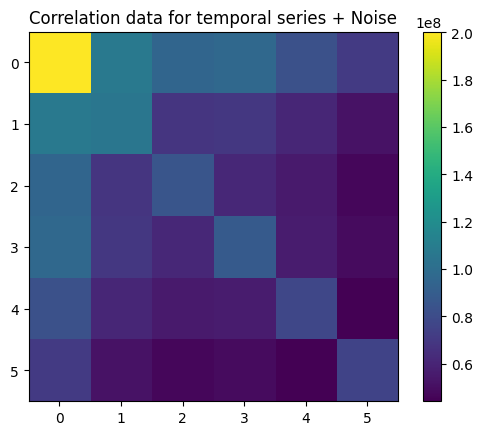

In [ ]:
# verificam pe date+zgomot corelatia si covariatia pt a compara cu prima imagine
# de corelatie mai scazuta

# realeg prima imagine
linie_px = 830
coloana_px = 800

w = 99 # dimens ferestrei

X = temp_series[linie_px-w//2:linie_px+w//2+1, coloana_px-w//2:coloana_px+w//2+1,:]

print(np.shape(X))

X = np.reshape(X,[w**2,n]).T # 6 linii = numarul de imagini - w**2 coloane
                          # coloanele = realiz partic ale fiecarui pixel

# noise
X1 = 5000*np.random.normal(size=(6, 9801))  # medie 0
# corelatie standard 1 * 500 - maresc puterea zg

X2 = X+X1
# Matrice de corelatie - simetrica fata de diag principala
# valorile mai ridicate pe diag principala
w = 99

R2 =np.matmul(X2,X2.T)*(1/(m))
# print(np.shape(R1))

plt.figure(), plt.imshow(np.abs(R2)),
plt.colorbar(),
plt.title("Correlation data for temporal series + Noise"),
plt.show()

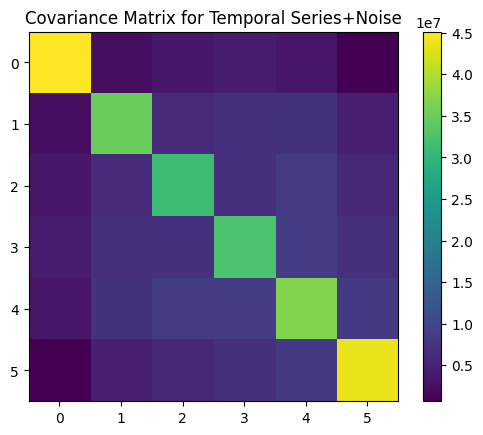

In [ ]:
# Matricea de covariatie
# calculam media pentru fiecare variabila - pe linie
md2 = np.reshape(np.mean(X2,1),[6,1])

C2 = np.matmul((X2-md2),(X2-md2).T)*(1/(m))
plt.figure(), plt.imshow(np.abs(C2)),
plt.colorbar(),
plt.title("Covariance Matrix for Temporal Series+Noise"),
plt.show()

# variatia devine mai uniforma, diferenta dintre val minima si maxima a mai scazut
# nu mai sunt discrepante mari intre val din matrice

In [ ]:
# matricea coef de corelatie
# la fel ca inainte trebuie sa calcula deviatia standard pt fiecare linie caci acolo
# avem variabilele - by default, functia face pe coloana

s2 = np.std(X2, 1) # deviatia standard
S2 = np.diag(1/s2)
print(np.shape(S2))

(6, 6)


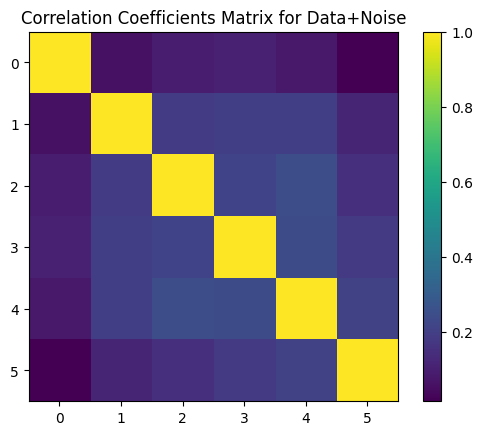

In [ ]:
H2 = np.matmul(np.matmul(S2,np.abs(C2)),S2)
plt.figure(), plt.imshow(np.abs(H2)),
plt.colorbar(),
plt.title("Correlation Coefficients Matrix for Data+Noise"),
plt.show()

# dupa aplicarea zgomotului alb gaussian pe prima imagine cu casa
# se observa ca scade corelatia, mai ales in matricea de corelatie
# precum si in matricea coeficientilor de corelatie
# astfel, zgomotul ar putea influenta corelatia elementelor unei
# imagini atunci cand este prezent